In [1]:
import sys
import os
from matplotlib import pyplot as plt

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")

In [2]:
from controllers.learner.datasets import get_hue_dataset1, filter_tags

In [16]:
import time
start_time = 1505590923.8668342
end_time = 1505591643.866895
print(start_time, end_time)

dataX, dataY, tags, touch_classes, look_classes = get_hue_dataset1("sean", start_time, end_time, 0, incl_touch=True, incl_look=False, incl_dist=False, incl_pose=False, incl_hand=True)
print(tags)

1505590923.8668342 1505591643.866895
403 images
57 hue data
['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'noth

In [17]:
dataX, dataY, y_classes = filter_tags(dataX, tags)
print(dataX.shape, dataY.shape)
print(dataY)

(155, 131) (155,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]


(155, 131) (155,)


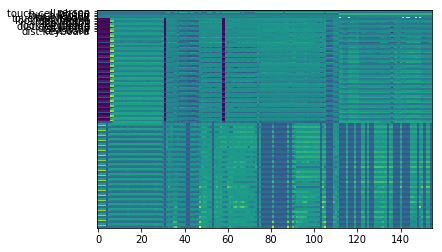

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import preprocessing

print(dataX.shape, dataY.shape)

ylabels = ["person"] + ["touch:" + t for t in touch_classes] + ["look:" + t for t in look_classes] + ["dist:" + t for t in touch_classes] 
plt.yticks(np.arange(len(ylabels)), ylabels)
dataX_scaled = preprocessing.scale(dataX)
plt.imshow(dataX_scaled.T, aspect="auto")

(155, 2) (155,)


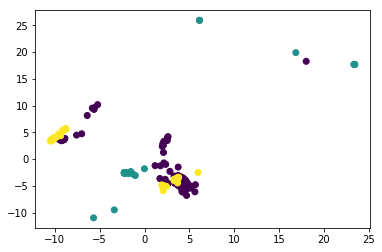

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

dataX_scaled = preprocessing.scale(dataX)
pca = PCA(n_components=2)
#tsne = TSNE(n_components=2, verbose=1, perplexity=500, n_iter=300)
X_r = pca.fit_transform(dataX_scaled)

colors = dataY
print(X_r.shape, dataY.shape)
plt.scatter(X_r[:,0], X_r[:,1], c=colors)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

np.random.seed(1984)
shuffle_i = np.random.permutation(np.arange(len(dataX)))
dataX_shuffled = dataX_scaled[shuffle_i]
dataY_shuffled = dataY[shuffle_i]

from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1e5)
#logreg.fit(X_train, y_train)
#print(logreg.score(X_test, y_test))
scores = cross_val_score(clf, dataX_shuffled, dataY_shuffled, cv=5)
print(scores, np.mean(scores), np.std(scores))

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
#clf = clf.fit(X_train, y_train)
scores = cross_val_score(clf, dataX_shuffled, dataY_shuffled, cv=5)
print(scores, np.mean(scores), np.std(scores))

from sklearn import svm
clf = svm.SVC()
scores = cross_val_score(clf, dataX_shuffled, dataY_shuffled, cv=5)
print(scores, np.mean(scores), np.std(scores))

clf = svm.LinearSVC()
scores = cross_val_score(clf, dataX_shuffled, dataY_shuffled, cv=5)
print(scores, np.mean(scores), np.std(scores))

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
scores = cross_val_score(clf, dataX_shuffled, dataY_shuffled, cv=5)
print(scores, np.mean(scores), np.std(scores))

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(dataX_scaled, dataY)

[ 0.96875     0.96875     0.87096774  1.          1.        ] 0.961693548387 0.0474668883441
[ 0.9375      0.9375      1.          0.96666667  1.        ] 0.968333333333 0.0279632695593
[ 0.96875  0.9375   1.       1.       1.     ] 0.98125 0.025
[ 0.96875     0.96875     0.87096774  1.          1.        ] 0.961693548387 0.0474668883441
[ 0.96875     0.9375      1.          0.93333333  0.96666667] 0.96125 0.0242097317439


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [27]:
import pickle
pickle.dump({"classes": y_classes, "classifier": logreg}, open("classifier.pkl", "wb+"))

FileNotFoundError: [Errno 2] No such file or directory: 'classifier.pkl'

In [22]:
start_time = 1505578728.1168005
end_time = 1505581018.450838

print(y_classes)
testX, _, tags, _, _ = get_hue_dataset1("sean", start_time, end_time, 0, incl_touch=True, incl_look=False, incl_dist=True, incl_pose=True, incl_hand=False)
testX, testY, _ = filter_tags(testX, tags, y_classes)
print(testX.shape, testY.shape)

['phone', 'nothing', 'laptop']
617 images
171 hue data
(93, 67) (93,)


In [23]:
testX_scaled = preprocessing.scale(testX)
shuffle_i = np.random.permutation(np.arange(len(testX)))
dataX_shuffled = testX_scaled[shuffle_i]
dataY_shuffled = testY[shuffle_i]

from sklearn import linear_model
from sklearn.metrics import confusion_matrix

clf = linear_model.LogisticRegression(C=1e5)
#logreg.fit(X_train, y_train)
#print(logreg.score(X_test, y_test))
scores = cross_val_score(clf, dataX_shuffled, dataY_shuffled, cv=5)
print(scores, np.mean(scores), np.std(scores))
#print(dataX_scaled.shape, dataY.shape, testX_scaled.shape, testY.shape)
clf.fit(dataX_scaled, dataY)
print(confusion_matrix(testY, clf.predict(testX_scaled)))
print(y_classes)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
#clf = clf.fit(X_train, y_train)
scores = cross_val_score(clf, dataX_shuffled, dataY_shuffled, cv=5)
print(scores, np.mean(scores), np.std(scores))

from sklearn import svm
clf = svm.SVC()
scores = cross_val_score(clf, dataX_shuffled, dataY_shuffled, cv=5)
print(scores, np.mean(scores), np.std(scores))

clf = svm.LinearSVC()
scores = cross_val_score(clf, dataX_shuffled, dataY_shuffled, cv=5)
print(scores, np.mean(scores), np.std(scores))

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
scores = cross_val_score(clf, dataX_shuffled, dataY_shuffled, cv=5)
print(scores, np.mean(scores), np.std(scores))

[ 0.8         0.85        0.94736842  0.88235294  0.94117647] 0.884179566563 0.0556763094281


ValueError: X has 67 features per sample; expecting 131